# 统计方法与机器学习实验作业五
## ——Clustering

## 一. 载入必要模块

以下是运行本次实验中必要的模块。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy.linalg import eig

# Cluster Method
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import confusion_matrix

## 二. 参数设置

在本次实验中，我们采用取随机种子的方式构建数据集。随机种子取的是学号的后三位；样本量为1500。

In [2]:
# ============
# Generate datasets
# ============
np.random.seed(434)
n_samples = 1500 # sample size

# ============
# Definitions of Functions
# ============
def mat_sqrt(Mat):
    eig_value,eig_vec = eig(Mat)
    return(eig_vec.dot(np.diag(np.sqrt(eig_value)).dot(eig_vec.T)))

## 三. 构造五种人工数据集

以下为原题目提供的五种的人工数据集的构造方式，并给出了未聚类前的图象。

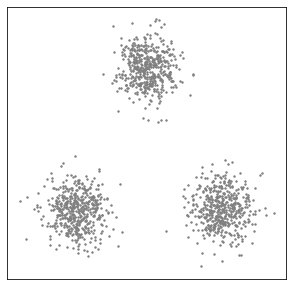

In [3]:
## Case One : Simple Case (Equal Variance and Equal Size)
K = 3
n_subset = int(n_samples/K)
z1 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))
z3 = np.random.normal(loc = 0, scale = 0.3,size = (n_subset,2))

mu1 = np.array([0,1])
mu2 = np.array([-math.sqrt(2),-math.sqrt(2)])
mu3 = np.array([math.sqrt(2),-math.sqrt(2)])

true_labels_1 = []
x11 = z1 + mu1
x12 = z2 + mu2
x13 = z3 + mu3
dataset1 = np.r_[x11,x12,x13]
for i in range(len(x11)):
    true_labels_1.append(0)
for i in range(len(x12)):
    true_labels_1.append(1)
for i in range(len(x13)):
    true_labels_1.append(2)

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x11[:,0],x11[:,1],color="grey",s = 2)
plt.scatter(x12[:,0],x12[:,1],color="grey",s = 2)
plt.scatter(x13[:,0],x13[:,1],color="grey",s = 2)


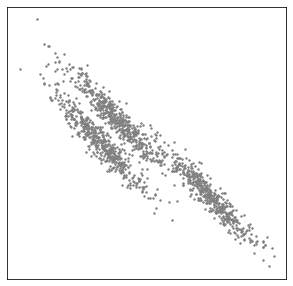

In [4]:
## Case Two : High-Covariance Case 
K = 3
n_subset = int(n_samples/K)
z1 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))
z3 = np.random.normal(loc = 0, scale = 1,size = (n_subset,2))

mu1 = np.array([-0.7,1])
rho1 = -0.95
mu2 = np.array([-1,0.5])
mu3 = np.array([1.25,-0.5])
Sigma = np.array([[1,rho1],[rho1,1]])
sigma1 = 0.5

true_labels_2 = []
x21 =  z1.dot(mat_sqrt(Sigma)*sigma1) + mu1
x22 = z2.dot(mat_sqrt(Sigma)*sigma1) + mu2
x23 = z3.dot(mat_sqrt(Sigma)*sigma1) + mu3
dataset2 = np.r_[x21,x22,x23]
for i in range(len(x21)):
    true_labels_2.append(0)
for i in range(len(x22)):
    true_labels_2.append(1)
for i in range(len(x23)):
    true_labels_2.append(2)

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x21[:,0],x21[:,1],color="grey",s = 2)
plt.scatter(x22[:,0],x22[:,1],color="grey",s = 2)
plt.scatter(x23[:,0],x23[:,1],color="grey",s = 2)

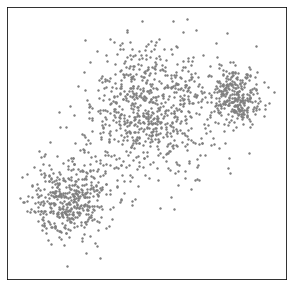

In [5]:
## Case Three : Unequal variance and Unequal size
mu1 = np.array([1.5,0.5])
mu2 = np.array([0.2,0.3])
mu3 = np.array([-1,-1])
sigma = 0.1
sigma1 = 2*sigma
sigma2 = 5*sigma
sigma3 = 3*sigma
n_subset1 = int(sigma1/(sigma1+sigma2+sigma3)*n_samples)
n_subset2 = int(sigma2/(sigma1+sigma2+sigma3)*n_samples)
n_subset3 = int(sigma3/(sigma1+sigma2+sigma3)*n_samples)

true_labels_3 = []
x31 = np.random.normal(loc = 0, scale = sigma1,size = (n_subset1,2)) + mu1
x32 = np.random.normal(loc = 0, scale = sigma2,size = (n_subset2,2)) + mu2
x33 = np.random.normal(loc = 0, scale = sigma3,size = (n_subset3,2)) + mu3

dataset3 = np.r_[x31,x32,x33]
for i in range(len(x31)):
    true_labels_3.append(0)
for i in range(len(x32)):
    true_labels_3.append(1)
for i in range(len(x33)):
    true_labels_3.append(2)

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x31[:,0],x31[:,1],color="grey",s = 2)
plt.scatter(x32[:,0],x32[:,1],color="grey",s = 2)
plt.scatter(x33[:,0],x33[:,1],color="grey",s = 2)

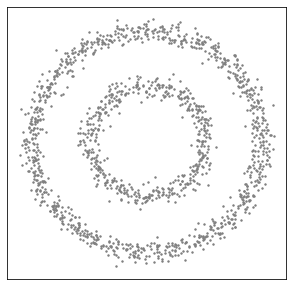

In [6]:
## Case Four : Ring Plot
r1 = 1
r2 = 2

K = r1+r2
n_subset1 = int(n_samples/K)
n_subset2 = int(n_samples/K*(K-1))
theta1 = np.linspace(1,360,n_subset1)/360*2*math.pi
theta2 = np.linspace(1,360,n_subset2)/360*2*math.pi
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset1,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset2,2))

true_labels_4 = []
x41 = np.transpose(np.array([[r1 * math.cos(theta1[i]) for i in range(len(theta1))],
               [r1 * math.sin(theta1[i]) for i in range(len(theta1))]])) + z1
x42 = np.transpose(np.array([[r2 * math.cos(theta2[i]) for i in range(len(theta2))],
               [r2 * math.sin(theta2[i]) for i in range(len(theta2))]])) + z2
dataset4 = np.r_[x41,x42]
for i in range(len(x41)):
    true_labels_4.append(0)
for i in range(len(x42)):
    true_labels_4.append(1)

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x41[:,0],x41[:,1],color="grey",s = 2)
plt.scatter(x42[:,0],x42[:,1],color="grey",s = 2)

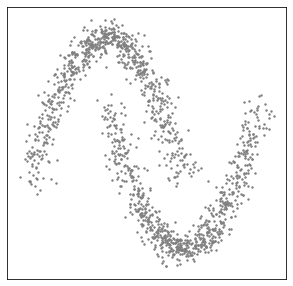

In [7]:
## Case Five : Wave Plot
a = 1/(-1.2+0.5)**2
n_subset=int(n_samples/2)

x = np.linspace(-1.5,0.5,n_subset)
y1 = (-a)*(x+0.5)**2 + 1.5
y2 = (a)*(-x -0.5)**2 - 1.5
z1 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))
z2 = np.random.normal(loc = 0, scale = 0.1,size = (n_subset,2))

true_labels_5 = []
x51 = np.c_[x,y1] + z1
x52 = np.c_[-x,y2] + z2
dataset5 = np.r_[x51,x52]
for i in range(len(x51)):
    true_labels_5.append(0)
for i in range(len(x52)):
    true_labels_5.append(1)

fig = plt.figure(figsize = [5,5])
ax = fig.add_subplot(1,1,1)
plt.xticks(())
plt.yticks(())
plt.scatter(x51[:,0],x51[:,1],color="grey",s = 2)
plt.scatter(x52[:,0],x52[:,1],color="grey",s = 2)


## 四. 实验任务

本次实验中，采用人造数据的方式构建不同类型的点集。每个点集均是一个二维数据集$\{(x_{i,1},x_{i,2}),i=1,2,\cdots,n\}$。本次实验的目的是形象地理解不同的聚类方法在不同类型的数据集上的表现是不同的，而且能够掌握如何构造人工数据集，并以此可以用于聚类方法的比较。
1. 阅读人工数据集的构造方法，并自行提供一种与所提供的五种不同的人工数据集。
2. 采用不同的聚类方式（包括：自下而上的层次聚类、Kmeans、GMM、DBSCAN），分别在六个数据集上进行聚类。
3. 用绘图的方式展示不同聚类方式的结果。
4. 在不同数据集上，分别使用外部聚类有效性和内部聚类有效性的度量方法来比较不同聚类方法。写明具体的外（内）部聚类有效性的度量方法，并将计算结果请填入下表（结论保留小数点后4位有效数字）。

<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td>                  </td>
        <td>                  </td>
    </tr>
</table>

5. 通过本次实验，评述各类聚类方法的使用范围。

6. （选做）复现层次聚类、Kmeans、GMM、DBSCAN的代码。复现指的是通过理解原始代码的逻辑和功能，重新编写出一个具有相同功能的代码，只能使用最基础的包，如numpy、math等。

参考资料：https://scikit-learn.org/stable/modules/clustering.html#clustering

## 五. 实验过程
1. 构造第六种人工数据集

我们构造第六种数据集的思路来源于https://scikit-learn.org/stable/modules/clustering.html#clustering，该数据集并没有一个显著的分类结构。尽管它没有一个显著的分类结构，但它可以是一个有效检验聚类方法的数据集。

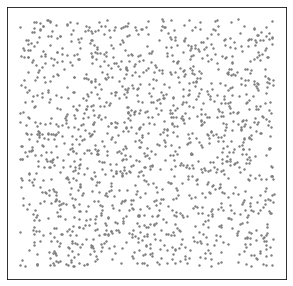

In [8]:
## Case Six : No structure
x = np.random.uniform(-1.5, 0.5, n_samples)
y = np.random.uniform(-1.5, 0.5, n_samples)

true_labels_6 = []
x6 = np.c_[x, y] 
dataset6 = x6
for i in range(len(x6)):
    true_labels_6.append(0)

fig = plt.figure(figsize=[5, 5])
ax = fig.add_subplot(1, 1, 1)
plt.xticks(())
plt.yticks(())
plt.scatter(x6[:, 0], x6[:, 1], color="grey", s=2)
plt.show()

为了方便后续实验，我们将所有数据集存储在一个列表中。

在这里，我们结合已知的信息为各个数据集确认不同的聚类个数。聚类个数可以被视为一个超参数，在实际使用中往往会通过使用**轮廓系数**来衡量一个聚类结果的优劣。在初始设置聚类个数时，可能也会通过观察数据的轮廓来得到比较好的结果。因此，如果一些聚类算法需要我们给出一个聚类的个数，那么我们会给出该数据集正确的分类个数。

另外，本实验的核心在于探究每个聚类算法适合使用的数据集。因此，我们倾向于给出正确的分类个数，从而可以将重心更多地偏移给研究聚类算法适合使用的数据集。但值得一提的是，由于我们给出的第6种数据集是一个没有特征的数据集，因此为了实验聚类的效果，我们会在需要的时候要求算法将该数据集分为4类。

In [9]:
# Put datasets into one list
datasets = [dataset1, dataset2, dataset3, dataset4, dataset5, dataset6]
data_clusters = [3,3,3,2,2,4]
true_labels = [true_labels_1, true_labels_2, true_labels_3, true_labels_4, true_labels_5, true_labels_6]

为了能够清晰地观察到同一聚类方法在不同数据集上的聚类效果，我们计划将每个数据集利用某种聚类方法进行聚类的结果作为一张图片的子图，通过观察具有六张子图的整张图片以观察同一聚类方法对不同数据集的聚类效果。

In [10]:
num_rows = 2
num_cols = 3

2. 使用各聚类方法

**A. 实现自下而上的层次聚类**

层次聚类一般分为**自下而上**与**自上而下**两种形式。其中，自下而上指的是每个样本各自分到一个类中，之后将类间距离最近的两类关联，并建立一个新的类，反复此过程直到所有的样本聚合至一个类中。自上而下则说的是将所有样本归到一个类中，之后将在类中相距最远的样本记为两个新的类，基于这两个类，将未进行聚类的点逐一比较其与两个新的类的距离，这样所有样本划分为了两类，在每一个类中重复此过程直到每个样本点各自分到一个类中。

在这里，我们尝试实现自下而上的层次聚类算法。

该算法需要我们填写参数n_clusters，指定类别个数。

该算法还需要我们指定链接算法。可以选择的链接算法主要有：
- ward: 采用Ward最小方差连接法。
- average: 采用平均连接法。
- complete: 采用两个集合中所有样本的距离的最大值。
- single: 采用简单连接法，即两个集合中所有样本的距离的最小值。

在这里，我们都将进行尝试并观测其效果。

In [11]:
# C存储了不同方法下的混淆矩阵
C_1 = []
C_2 = []
C_3 = []
C_4 = []
C_5 = []
C_6 = []
C_7 = []

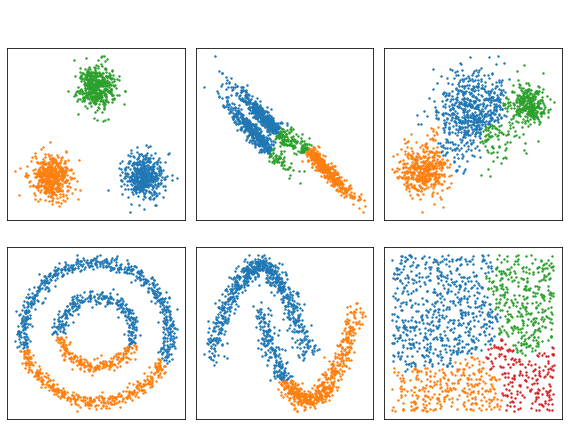

In [12]:
# Ward: 采用Ward最小方差连接法。
plt.figure(figsize=(8, 6))

for i in range(0,len(datasets)):
    using_dataset = true_labels[i]
    model = AgglomerativeClustering(n_clusters=data_clusters[i], linkage='ward')
    clusters = model.fit_predict(datasets[i])
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks(())
    plt.yticks(())
    for cluster_id in np.unique(clusters):
        plt.scatter(datasets[i][clusters == cluster_id][:,0], datasets[i][clusters == cluster_id][:,1], s=2, label=f'Cluster {cluster_id}')
    cm = confusion_matrix(using_dataset, clusters).T
    C_1.append([cm, clusters])
    plt.title(f"Dataset {i+1}", color="white")
    # plt.legend()
plt.suptitle("AgglomerativeClustering - Ward", color="white")
plt.tight_layout()
plt.show()

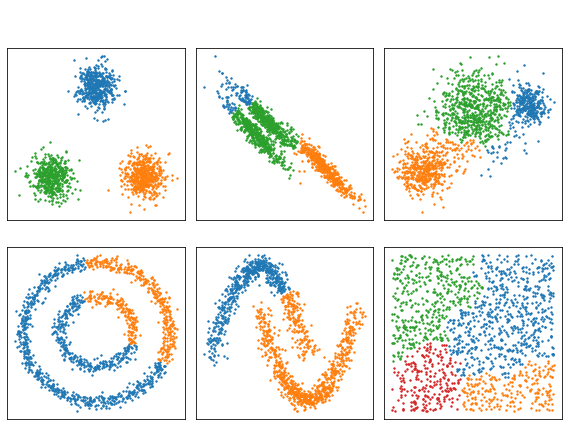

In [13]:
# Average: 采用平均连接法。
plt.figure(figsize=(8, 6))

for i in range(0,len(datasets)):
    using_dataset = true_labels[i]
    model = AgglomerativeClustering(n_clusters=data_clusters[i], linkage='average')
    clusters = model.fit_predict(datasets[i])
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks(())
    plt.yticks(())

    for cluster_id in np.unique(clusters):
        plt.scatter(datasets[i][clusters == cluster_id][:,0], datasets[i][clusters == cluster_id][:,1], s=2, label=f'Cluster {cluster_id}')
    cm = confusion_matrix(using_dataset, clusters).T
    C_2.append([cm, clusters])
    plt.title(f"Dataset {i+1}", color="white")
    # plt.legend()
plt.suptitle("AgglomerativeClustering - Average", color="white")
plt.tight_layout()
plt.show()

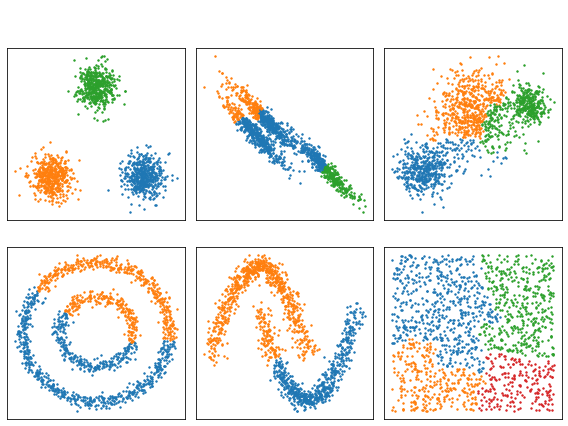

In [14]:
# Complete: 采用两个集合中所有样本的距离的最大值。
plt.figure(figsize=(8, 6))

for i in range(0,len(datasets)):
    using_dataset = true_labels[i]
    model = AgglomerativeClustering(n_clusters=data_clusters[i], linkage='complete')
    clusters = model.fit_predict(datasets[i])
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks(())
    plt.yticks(())

    for cluster_id in np.unique(clusters):
        plt.scatter(datasets[i][clusters == cluster_id][:,0], datasets[i][clusters == cluster_id][:,1], s=2, label=f'Cluster {cluster_id}')
    cm = confusion_matrix(using_dataset, clusters).T
    C_3.append([cm, clusters])
    plt.title(f"Dataset {i+1}", color="white")
    # plt.legend()
plt.suptitle("AgglomerativeClustering - Complete", color="white")
plt.tight_layout()
plt.show()

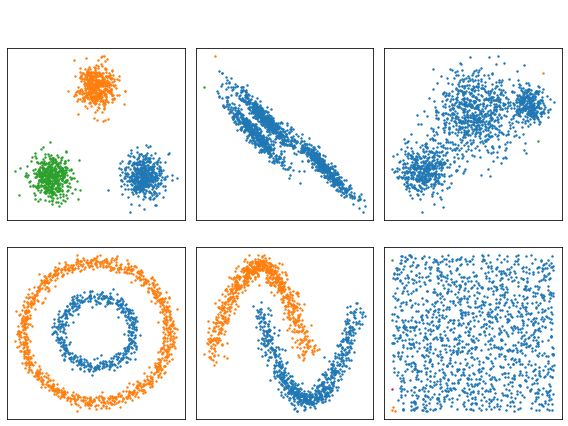

In [15]:
# Single: 采用简单连接法，即两个集合中所有样本的距离的最小值。
plt.figure(figsize=(8, 6))

for i in range(0,len(datasets)):
    using_dataset = true_labels[i]
    model = AgglomerativeClustering(n_clusters=data_clusters[i], linkage='single')
    clusters = model.fit_predict(datasets[i])
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks(())
    plt.yticks(())

    for cluster_id in np.unique(clusters):
        plt.scatter(datasets[i][clusters == cluster_id][:,0], datasets[i][clusters == cluster_id][:,1], s=2, label=f'Cluster {cluster_id}')
    cm = confusion_matrix(using_dataset, clusters).T
    C_4.append([cm, clusters])
    plt.title(f"Dataset {i+1}", color="white")
    # plt.legend()
plt.suptitle("AgglomerativeClustering - Single", color="white")
plt.tight_layout()
plt.show()

**B. 实现K-means**

K-means是一个计算速度较快的聚类方法。它的思路是找到一个最优划分$C^*$，使得类内距离足够小而类间距离足够大。在K-means聚类方法中，通常采用平方欧氏距离来表示点与点之间的距离，即
$$
||x_k-x_l||_2^2=\sum^p_{j=1}(x_{kj}-x_{lj})^2
$$
由此，我们可以定义一个合理的损失函数，即
$$
L(C)=\sum^K_{k=1} \sum_{i \in C_k}||x_i-m_k||^2_2
$$
其中，$m_k$表示第k类中所有样本的均值。

K-means实际上就是解决一个最优化问题
$$
C^*=\arg \min_C L(C)
$$

对非凸的数据集使用K-means往往效果不佳。接下来我们将对6个数据集尝试K-means并对结果进行观察。

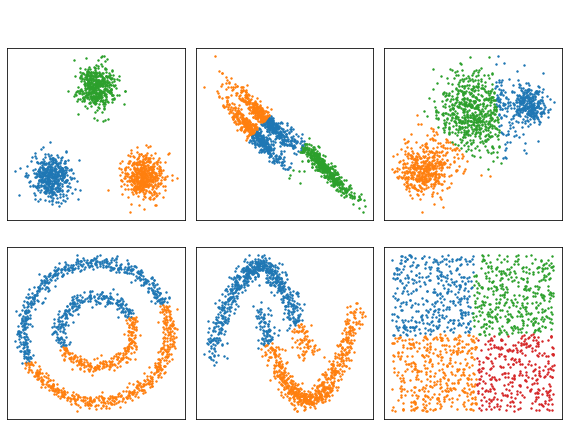

In [16]:
plt.figure(figsize=(8, 6))

for i in range(0,len(datasets)):
    using_dataset = true_labels[i]
    model = KMeans(n_clusters=data_clusters[i], algorithm="elkan", n_init="auto")
    clusters = model.fit_predict(datasets[i])
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks(())
    plt.yticks(())

    for cluster_id in np.unique(clusters):
        plt.scatter(datasets[i][clusters == cluster_id][:,0], datasets[i][clusters == cluster_id][:,1], s=2, label=f'Cluster {cluster_id}')
    cm = confusion_matrix(using_dataset, clusters).T
    C_5.append([cm, clusters])
    plt.title(f"Dataset {i+1}", color="white")
    # plt.legend()
plt.suptitle("K - means", color="white")
plt.tight_layout()
plt.show()

**C. 实现Gaussian Mixture Model**

Gaussian Mixture Model即混合高斯模型，它的核心是假定来自一个类的样本均服从同一个正态分布。在考虑了概率密度函数并使用EM算法后，我们可以求得参数
$$
\mu_k=\frac{\sum^n_{i=1} \pi^*_{ik}x_i}{\sum^n_{i=1}\pi_{ik}^*}
$$
$$
\Sigma_k=\frac{\sum^n_{i=1}\pi^*_{ik}(x_i-\mu_k)(x_i-\mu_k)'}{\sum^n_{i=1}\pi_{ik}^*}
$$
$$
\pi_k = \frac{\sum^n_{i=1}\pi^*_{ik}}{n}
$$
其中，$\mu_k$表示第$k$个正态分布的期望，$\Sigma_k$表示第$k$个正态分布的协方差矩阵，$\pi_k$表示第$i$个样本是来自于第$k$个高斯分布总体的概率。

接下来我们将对6个数据集尝试混合高斯模型并对结果进行观察。

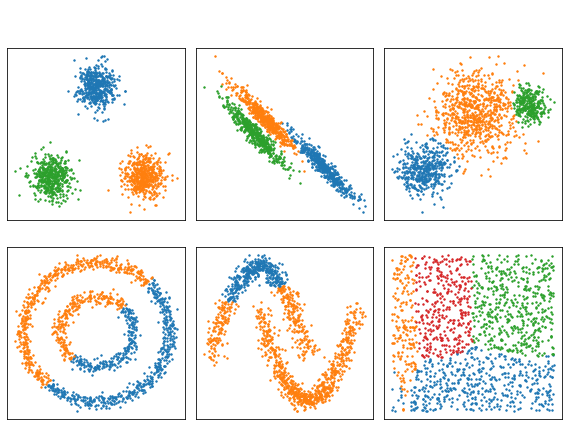

In [17]:
plt.figure(figsize=(8, 6))

for i in range(0,len(datasets)):
    using_dataset = true_labels[i]
    model = GaussianMixture(n_components=data_clusters[i],init_params="random_from_data")
    clusters = model.fit_predict(datasets[i])
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks(())
    plt.yticks(())

    for cluster_id in np.unique(clusters):
        plt.scatter(datasets[i][clusters == cluster_id][:,0], datasets[i][clusters == cluster_id][:,1], s=2, label=f'Cluster {cluster_id}')
    cm = confusion_matrix(using_dataset, clusters).T
    C_6.append([cm, clusters])
    plt.title(f"Dataset {i+1}", color="white")
    # plt.legend()
plt.suptitle("Gaussian Mixture Model", color="white")
plt.tight_layout()
plt.show()

**D. DBSCAN**

DBSCAN是一种典型的基于密度的聚类方法。它的主要思想是，如果要判断两个样本属于同一类别，那么在这两个样本的附近，能够找到属于同一类别的样本。

接下来我们将对6个数据集尝试DBSCAN并对结果进行观察。

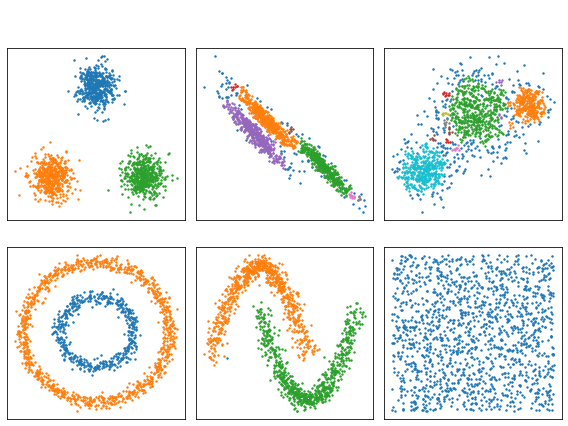

In [18]:
plt.figure(figsize=(8, 6))
eps_dataset = [0.5, 0.097, 0.08, 0.2, 0.163, 0.2]
min_samples_array = [5, 5, 5, 5, 5, 5]

for i in range(0,len(datasets)):
    using_dataset = true_labels[i]
    model = DBSCAN(eps=eps_dataset[i], min_samples=min_samples_array[i])
    clusters = model.fit_predict(datasets[i])
    plt.subplot(num_rows, num_cols, i+1)
    plt.xticks(())
    plt.yticks(())
    for cluster_id in np.unique(clusters):
        plt.scatter(datasets[i][clusters == cluster_id][:,0], datasets[i][clusters == cluster_id][:,1], s=2, label=f'Cluster {cluster_id}')
    cm = confusion_matrix(using_dataset, clusters).T
    C_7.append([cm, clusters])
    plt.title(f"Dataset {i+1}", color="white")
    # plt.legend()
plt.suptitle("DBSCAN", color="white")
plt.tight_layout()
plt.show()

3. 评价聚类有效性

聚类有效性是评价聚类结果的方式。

聚类有效性的度量方法分为外部聚类有效性与内部聚类有效性。他们的区别在于，是否使用外部的信息以评价聚类的有效性。

**A. 外部聚类有效性**

现在我们编写外部聚类有效性。对于$n$个测试样本，假定分类结果为$C=\{C_1, C_2, \cdots, C_K\}$，并满足
$$
C_K \cap C_l = \emptyset, \bigcup^K_{k=1} C_i=X
$$

其中$K$为聚类数目。

假设“真实的”标签划分$y=\{Y_1, Y_2, \cdots, Y_K'\}$，并满足
$$
Y_K \cap Y_l = \emptyset, \bigcup^K_{k=1} Y_i=X
$$

其中$K'$为真实分类数目。

我们定义一个可能性矩阵，其第$i行第$j$列表示第$i$个聚类里的点在第$j$个分类里的个数，记为$n_{ij}$。这已经在上述代码中通过$C$来实现。

基于此，我们可以计算
$$
p_{ij}=\frac{n_{ij}}{n}, \space p_i=\frac{n_{i.}}{n}, \space p_j=\frac{n_{.j}}{n}
$$

熵和纯度是两种最常用的外部度量。

熵(Entropy)为
$$
E = -\sum_i p_i(\sum_j \frac{p_{ij}}{p_i} \ln \frac{p_{ij}}{p_i})
$$

纯度(Purity)为
$$
P = \sum_i p_i(\max_j \frac{p_{ij}}{p_i})
$$

在这里，我们通过计算纯度来衡量外部聚类有效性。

In [19]:
# 计算一个P矩阵，其中元素为p_{ij}
def p_matrix(matrix):
    result = np.zeros(matrix.shape)
    datasize = np.sum(matrix)
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            result[i][j] = matrix[i][j] / datasize
    result_i = np.sum(result, axis=1)
    result_j = np.sum(result, axis=0)
    return result, result_i, result_j

In [20]:
# 计算纯度作为外部聚类有效性
def pure(p, p_i, p_j):
    result = 0
    i_shape = len(p_i)
    j_shape = len(p_j)
    for i in range(i_shape):
        max_j = 0
        for j in range(j_shape):
            max_j = max(p[i][j]/p_i[i], max_j)
        result = result + p_i[i] * max_j
    return result

In [21]:
def purity(matrix):
    p, p_i, p_j = p_matrix(matrix)
    result = pure(p, p_i, p_j)
    return result

**B. 外部聚类有效性**

接下来我们计算内部聚类有效性。我们使用$R^2$
$$
1-\frac{\sum^K_{k=1} \sum_{i\in C_k} ||x_i - m_k||^2_2}{\sum^n_{i=1}||x_i - \bar{x}||_2^2}
$$
来衡量内部聚类有效性。

In [22]:
# 计算R^2
def R_square(dataset, clusters):
    x1_average = np.average(dataset[:,0])
    x2_average = np.average(dataset[:,1])
    # m = []
    classify_clusters = np.unique(clusters)

    # 分母
    under = 0
    for i in range(len(dataset)):
        under = under + (dataset[i][0] - x1_average)**2 + (dataset[i][1] - x2_average)**2

    # 分子
    above = 0
    for cluster_id in classify_clusters:
        first = dataset[clusters == cluster_id][:,0]
        second = dataset[clusters == cluster_id][:,1]
        m1_average = np.average(first)
        m2_average = np.average(second)
        # m.append([m1_average, m2_average])
        for i in range(len(first)):
            above = above + (first[i] - m1_average)**2 + (second[i] - m2_average)**2
    
    result = 1 - above / under
    return result

下面我们开始为每一个数据集计算每一个聚类方法的外部聚类有效性与内部聚类有效性。

In [23]:
all_C = np.array([np.array(C_1), np.array(C_2), np.array(C_3), np.array(C_4), np.array(C_5), np.array(C_6), np.array(C_7)], dtype=object)

C:\Users\user\AppData\Local\Temp/ipykernel_6388/3712066511.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  all_C = np.array([np.array(C_1), np.array(C_2), np.array(C_3), np.array(C_4), np.array(C_5), np.array(C_6), np.array(C_7)], dtype=object)


In [24]:
for i in range(7):
    print(round(purity(all_C[i][0][0]),4), round(R_square(dataset1, all_C[i][0][1]),4))

1.0 0.9376
1.0 0.9376
1.0 0.9376
1.0 0.9376
1.0 0.9376
1.0 0.9376
1.0 0.9376


因此，第一个数据集的外部聚类有效性和内部聚类有效性有如下表格作为结果。
<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类(Ward)                 </td>
        <td> 1.0000                 </td>
        <td> 0.9376                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Average)                 </td>
        <td> 1.0000                 </td>
        <td> 0.9376                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Complete)                 </td>
        <td> 1.0000                 </td>
        <td> 0.9376                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Single)                 </td>
        <td> 1.0000                 </td>
        <td> 0.9376                 </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td> 1.0000                 </td>
        <td> 0.9376                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 1.0000                 </td>
        <td> 0.9376                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 1.0000                 </td>
        <td> 0.9376                  </td>
    </tr>
</table>

In [25]:
for i in range(7):
    print(round(purity(all_C[i][1][0]),4), round(R_square(dataset2, all_C[i][1][1]),4))

0.6453 0.8097
0.6807 0.7993
0.5527 0.658
0.3347 0.0072
0.654 0.8388
0.9927 0.7458
0.9513 0.7206


因此，第二个数据集的外部聚类有效性和内部聚类有效性有如下表格作为结果。
<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类(Ward)                 </td>
        <td> 0.6453                 </td>
        <td> 0.8097                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Average)                 </td>
        <td> 0.6807                 </td>
        <td> 0.7993                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Complete)                 </td>
        <td> 0.5527                 </td>
        <td> 0.6580                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Single)                 </td>
        <td> 0.3347                 </td>
        <td> 0.0072                 </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td> 0.6540                 </td>
        <td> 0.8388                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 0.9927                 </td>
        <td> 0.7458                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 0.9513                 </td>
        <td> 0.7206                  </td>
    </tr>
</table>

In [26]:
for i in range(7):
    print(round(purity(all_C[i][2][0]),4), round(R_square(dataset3, all_C[i][2][1]),4))

0.9033 0.7916
0.918 0.8027
0.844 0.7911
0.5 0.0033
0.8967 0.8193
0.9747 0.7953
0.932 0.7318


因此，第三个数据集的外部聚类有效性和内部聚类有效性有如下表格作为结果。
<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类(Ward)                 </td>
        <td> 0.9033                 </td>
        <td> 0.7916                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Average)                 </td>
        <td> 0.9180                 </td>
        <td> 0.8027                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Complete)                 </td>
        <td> 0.8440                 </td>
        <td> 0.7911                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Single)                 </td>
        <td> 0.5000                 </td>
        <td> 0.0033                 </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td> 0.8967                 </td>
        <td> 0.8193                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 0.9747                 </td>
        <td> 0.7953                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 0.9320                 </td>
        <td> 0.7318                  </td>
    </tr>
</table>

In [27]:
for i in range(7):
    print(round(purity(all_C[i][3][0]),4), round(R_square(dataset4, all_C[i][3][1]),4))

0.6667 0.3513
0.6667 0.3242
0.6667 0.3599
1.0 0.0
0.6667 0.3724
0.6667 0.3725
1.0 0.0


因此，第四个数据集的外部聚类有效性和内部聚类有效性有如下表格作为结果。
<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类(Ward)                 </td>
        <td> 0.6667                 </td>
        <td> 0.3513                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Average)                 </td>
        <td> 0.6667                 </td>
        <td> 0.3242                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Complete)                 </td>
        <td> 0.6667                 </td>
        <td> 0.3599                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Single)                 </td>
        <td> 1.0000                 </td>
        <td> 0.0000                 </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td> 0.6667                 </td>
        <td> 0.3724                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 0.6667                 </td>
        <td> 0.3725                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 1.0000                 </td>
        <td> 0.0000                  </td>
    </tr>
</table>

In [28]:
for i in range(7):
    print(round(purity(all_C[i][4][0]),4), round(R_square(dataset5, all_C[i][4][1]),4))

0.8647 0.5502
0.8847 0.577
0.9147 0.6047
0.9993 0.5621
0.8953 0.6469
0.772 0.4538
0.9993 0.5631


因此，第五个数据集的外部聚类有效性和内部聚类有效性有如下表格作为结果。
<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类(Ward)                 </td>
        <td> 0.8647                 </td>
        <td> 0.5502                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Average)                 </td>
        <td> 0.8847                 </td>
        <td> 0.5770                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Complete)                 </td>
        <td> 0.9147                 </td>
        <td> 0.6047                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Single)                 </td>
        <td> 0.9993                 </td>
        <td> 0.5621                 </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td> 0.8953                 </td>
        <td> 0.6469                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 0.7720                 </td>
        <td> 0.4538                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 0.9993                 </td>
        <td> 0.5631                  </td>
    </tr>
</table>

In [29]:
for i in range(7):
    print(round(purity(all_C[i][5][0]),4), round(R_square(dataset6, all_C[i][5][1]),4))

1.0 0.6801
1.0 0.6689
1.0 0.6918
1.0 0.0093
1.0 0.7426
1.0 0.6268
1.0 0.0


因此，第六个数据集的外部聚类有效性和内部聚类有效性有如下表格作为结果。
<table width = c(100,500,500), center = True>
    <tr>
        <td> 方法                  </td>
        <td> 外部有效性                 </td>
        <td> 内部有效性                 </td>
    </tr>
    <tr>
        <td> 层次聚类(Ward)                 </td>
        <td> 1.0000                 </td>
        <td> 0.6801                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Average)                 </td>
        <td> 1.0000                 </td>
        <td> 0.6689                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Complete)                 </td>
        <td> 1.0000                 </td>
        <td> 0.6918                 </td>
    </tr>
        <tr>
        <td> 层次聚类(Single)                 </td>
        <td> 1.0000                 </td>
        <td> 0.0093                 </td>
    </tr>
      <tr>
        <td> Kmean                 </td>
        <td> 1.0000                 </td>
        <td> 0.7426                 </td>
    </tr>
      <tr>
        <td> GMM                 </td>
        <td> 1.0000                 </td>
        <td> 0.6268                 </td>
    </tr>
      <tr>
        <td> DBSCAN                 </td>
        <td> 1.0000                 </td>
        <td> 0.0000                  </td>
    </tr>
</table>

通过观测，我们可以发现，内部聚类有效性的结果往往会十分跳跃，与外部聚类有效性体现出的聚类效果可能会不一致。这主要是因为我们在评价内部聚类有效性时我们引入实际分布作为考量指标，这使得他们更在意聚类后的点的结构，不在意实际分布。因此，在我们有实际分布的情况下，更应该参考外部聚类有效性。

基于这样的认知，我们会发现，数据集一在各个聚类方法中都有着近乎完美的聚类效果。数据集二在GMM和DBSCAN中可以有不错的聚类效果。数据集三在层次聚类(Single)以外的聚类方法中都有不错的效果。数据集四在层次聚类(Single)和DBSCAN中有最好的聚类效果。数据集五在GMM以外的聚类方法中表现较好。数据集六尽管在外部有效性的数值上来看效果很好，但实际上它只有一个分类，根据纯度的公式，无论如何分类其外部有效性都将是1，因此外部有效性对其缺乏参考价值，相反，我们可以发现一个聚类的内部聚类有效性数值越低，该聚类效果越好，这主要是因为该数据集实际上只有一个分类，内部聚类有效性越高反而说明其分类越明显。

这也因此启发了我们认识不同聚类方法的适用条件。层次聚类(Ward)、层次聚类(Average)和层次聚类(Complete)比较适合凸数据族，团状、球状数据（如数据集一、三），层次聚类(Single)比较适合不同数据族之间距离较大的数据集（如数据集一、四、五、六），K-means比较适合凸数据族，团状、球状数据（如数据集一、三），GMM可以适应于正态分布的凸数据族（如数据集一、数据集二、数据集三），DBSCAN由于其调整的参数在于距离，因此它可以有效地适应各个情况，总体表现最佳。

综合来看，DBSCAN是一个总体上最优秀的聚类方法，可以适应于各种情况。